<a href="https://colab.research.google.com/github/mwinzie/Football-Analysis-Mchezopesa-Limited/blob/master/Moringa_Data_Science_Prep_W7_Independent_Project_2019_09_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last week, I looked at the M

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_me
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [188]:
#loading and previewing the dataset
df = pd.read_csv('cleanfifa.csv', index_col = 0)
df.head(2)

,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0


In [43]:
df.columns

Index(['home_team', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'city_x', 'country_x', 'neutral_x', 'game_result_x',
       'month', 'year', 'game_x', 'hometeam_rank', 'awayteam_rank'],
      dtype='object')

In [189]:
#renaming columns
df.rename(columns = {'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament', 'city_x': 'city', 'country_x': 'country',
                     'neutral_x': 'neutral', 'game_result_x': 'game_result', 'game_x': 'game'}, inplace = True)
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0


In [45]:
#checking the columns and rows in the dataset
df.shape

(24064, 14)

In [46]:
#checking the dataset for any null values
df.isnull().sum()

home_team           0
away_team           0
home_score          0
away_score          0
tournament          0
city                0
country             0
neutral             0
game_result         0
month               0
year                0
game                0
hometeam_rank    4543
awayteam_rank    4651
dtype: int64

In [0]:
#the null values are 18% of the dataset, so i shall drop all null values
df.dropna(inplace = True)

In [147]:
#confirming the drop of the columns
df.isnull().sum()

home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
game_result      0
month            0
year             0
game             0
hometeam_rank    0
awayteam_rank    0
dtype: int64

In [148]:
#checking the unique observations in the tournament column so as to have 3 tournament types: world cup, friendly and others
df['tournament'].unique().tolist()

['FIFA World Cup qualification',
 'Friendly',
 'African Cup of Nations qualification',
 'Amílcar Cabral Cup',
 'United Arab Emirates Friendship Tournament',
 'Malta International Tournament',
 'CFU Caribbean Cup qualification',
 'African Cup of Nations',
 'CFU Caribbean Cup',
 'UEFA Euro qualification',
 'Kirin Cup',
 'FIFA World Cup',
 'Oceania Nations Cup qualification',
 'Baltic Cup',
 'Gulf Cup',
 'Simba Tournament',
 'CECAFA Cup',
 'Dynasty Cup',
 "King's Cup",
 'SAFF Cup',
 'Copa Paz del Chaco',
 'Korea Cup',
 'USA Cup',
 'Copa América',
 'Merdeka Tournament',
 'South Pacific Games',
 'UNCAF Cup',
 'Oceania Nations Cup',
 'Windward Islands Tournament',
 'Gold Cup',
 'AFC Asian Cup qualification',
 'Lunar New Year Cup',
 'AFF Championship',
 'AFC Asian Cup',
 'King Hassan II Tournament',
 'Cyprus International Tournament',
 'Dunhill Cup',
 'Nehru Cup',
 'COSAFA Cup',
 'Tournoi de France',
 'Confederations Cup',
 'UAFA Cup',
 'Gold Cup qualification',
 'UNIFFAC Cup',
 'Nordic Champ

In [0]:
#using a function to have 3 tournament types
def tourna(x):
  if x == 'Fifa World Cup':
    return 'world cup'
  elif x == 'Friendly':
    return 'friendly'
  else:
    return 'others'

In [0]:
#applying the function for the tournament types
df['tourna']=df.tournament.apply(lambda x: tourna(x))

In [52]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank,tourna
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0,others
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0,friendly


In [0]:
#dropping the column tornament and remaining with the tourna column that has the 3 tournament types
df.drop('tournament', axis =1,inplace = True)

In [56]:
df.head(2)

,home_team,away_team,home_score,away_score,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank,tourna
0,Bolivia,Uruguay,3,1,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0,others
1,Brazil,Mexico,1,1,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0,friendly


In [58]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'city', 'country',
       'neutral', 'game_result', 'month', 'year', 'game', 'hometeam_rank',
       'awayteam_rank', 'tourna'],
      dtype='object')

In [194]:
#checking for unique values in some of the columns
cols = ['neutral','game_result','tourna']
for i in cols:
  print(df[i].unique())

[False  True]
['win' 'draw' 'lose']
['others' 'friendly']


In [0]:
#encoding the categorical features in the neutral, game result and tourna column

le = preprocessing.LabelEncoder()
df['neutral'] = le.fit_transform(df['neutral'])
df['game_result'] = le.fit_transform(df['game_result'])
df['tourna'] = le.fit_transform(df['tourna'])

In [196]:
#confirming the encoding changes
for i in cols:
  print(df[i].unique())

[0 1]
[2 0 1]
[1 0]


In [0]:
#converting the encoded columns to int data type
df['neutral']= df['neutral'].astype(int)
df['game_result'] = df['game_result'].astype(int)
df['tourna'] = df['tourna'].astype(int)

In [198]:
df.dtypes

home_team         object
away_team         object
home_score         int64
away_score         int64
city              object
country           object
neutral            int64
game_result        int64
month              int64
year               int64
game              object
hometeam_rank    float64
awayteam_rank    float64
tourna             int64
dtype: object

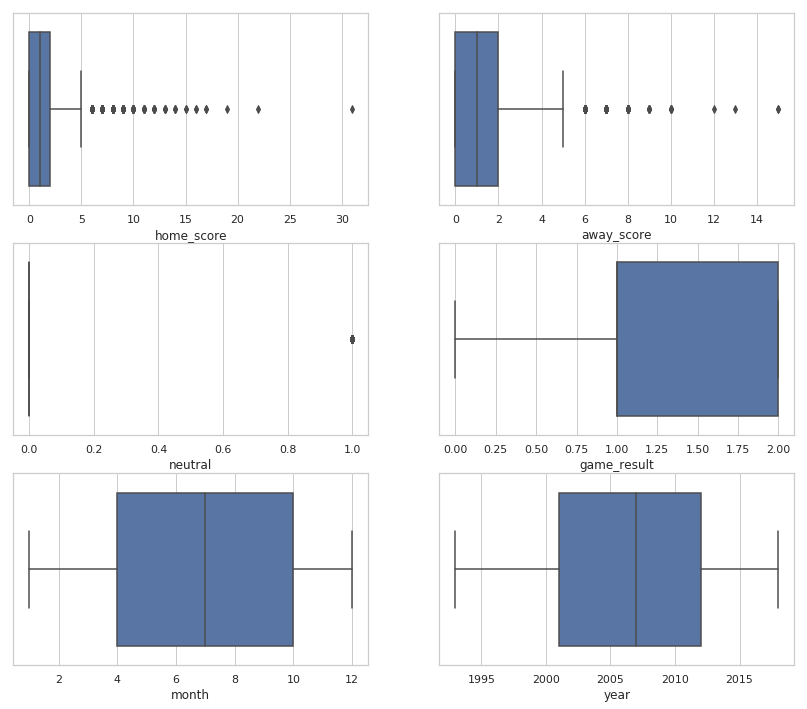

In [199]:
#created a list for all the numerical columns in the df dataframe
#used a for loop to iterate over the list of the numerical columns so as to plot all the boxplots
numericcols = ['home_score', 'away_score','neutral','game_result','month', 'year','hometeam_rank', 'awayteam_rank','tourna']
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),df,numericcols):
  sns.boxplot(df[column],ax=ax)

From the observations, the home score, away scores and neutral columns have presence of outliers. Next we shall check the unique values in both the columns to determine what to do with the outliers. There seems to be goal scores that are way too high. I shall remove them for the purpose of creating my model.

In [200]:
#calculating the IQR for the numeric columns 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

home_score        2.0
away_score        2.0
neutral           0.0
game_result       1.0
month             6.0
year             11.0
hometeam_rank    78.0
awayteam_rank    81.0
tourna            1.0
dtype: float64


In [201]:
df.dtypes

home_team         object
away_team         object
home_score         int64
away_score         int64
city              object
country           object
neutral            int64
game_result        int64
month              int64
year               int64
game              object
hometeam_rank    float64
awayteam_rank    float64
tourna             int64
dtype: object

In [159]:
df.isnull().sum()

home_team        0
away_team        0
home_score       0
away_score       0
city             0
country          0
neutral          0
game_result      0
month            0
year             0
game             0
hometeam_rank    0
awayteam_rank    0
tourna           0
dtype: int64

In [202]:
#checking for outliers using the inter quartile range
(df<(Q1 - 1.5*IQR)) |(df > (Q3 + 1.5*IQR))

,away_score,away_team,awayteam_rank,city,country,game,game_result,home_score,home_team,hometeam_rank,month,neutral,tourna,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [203]:
#removing outliers using inter quartile range
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(13110, 14)

In [204]:
#this shows the descriptive statistics of the dataset
df.describe()

,home_score,away_score,neutral,game_result,month,year,hometeam_rank,awayteam_rank,tourna
count,13110.000000,13110.000000,13110.0,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000,13110.000000
mean,1.497330,0.976049,0.0,1.245919,7.028223,2006.227155,76.092067,77.511823,0.571243
std,1.284094,1.076680,0.0,0.826148,3.191734,6.757673,49.251667,50.543231,0.494917
min,0.000000,0.000000,0.0,0.000000,1.000000,1993.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.0,1.000000,4.000000,2001.000000,35.000000,35.000000,0.000000
50%,1.000000,1.000000,0.0,1.000000,8.000000,2007.000000,71.000000,72.000000,1.000000
75%,2.000000,2.000000,0.0,2.000000,10.000000,2012.000000,111.000000,113.000000,1.000000
max,5.000000,5.000000,0.0,2.000000,12.000000,2018.000000,209.000000,209.000000,1.000000


In [0]:
wins = wins.reset_index()
wins

Text(0.5, 1.0, 'Results of Football Games')

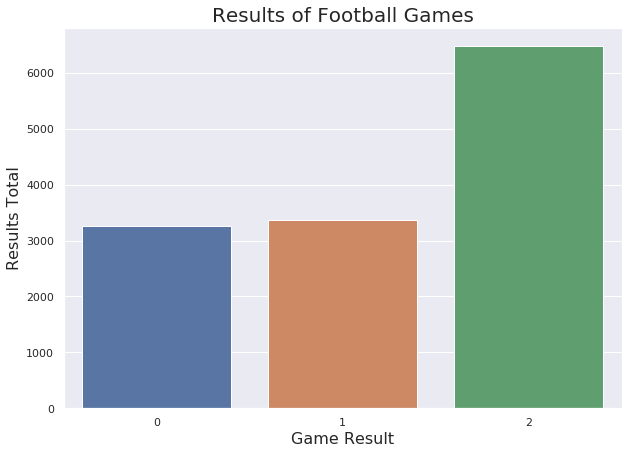

In [208]:
plt.figure(figsize = (10, 7))
sns.barplot(wins.game_result, wins.country)
sns.set_style('darkgrid')
plt.xlabel('Game Result', fontsize = 16)
plt.ylabel('Results Total', fontsize = 16)
plt.title('Results of Football Games', fontsize = 20)

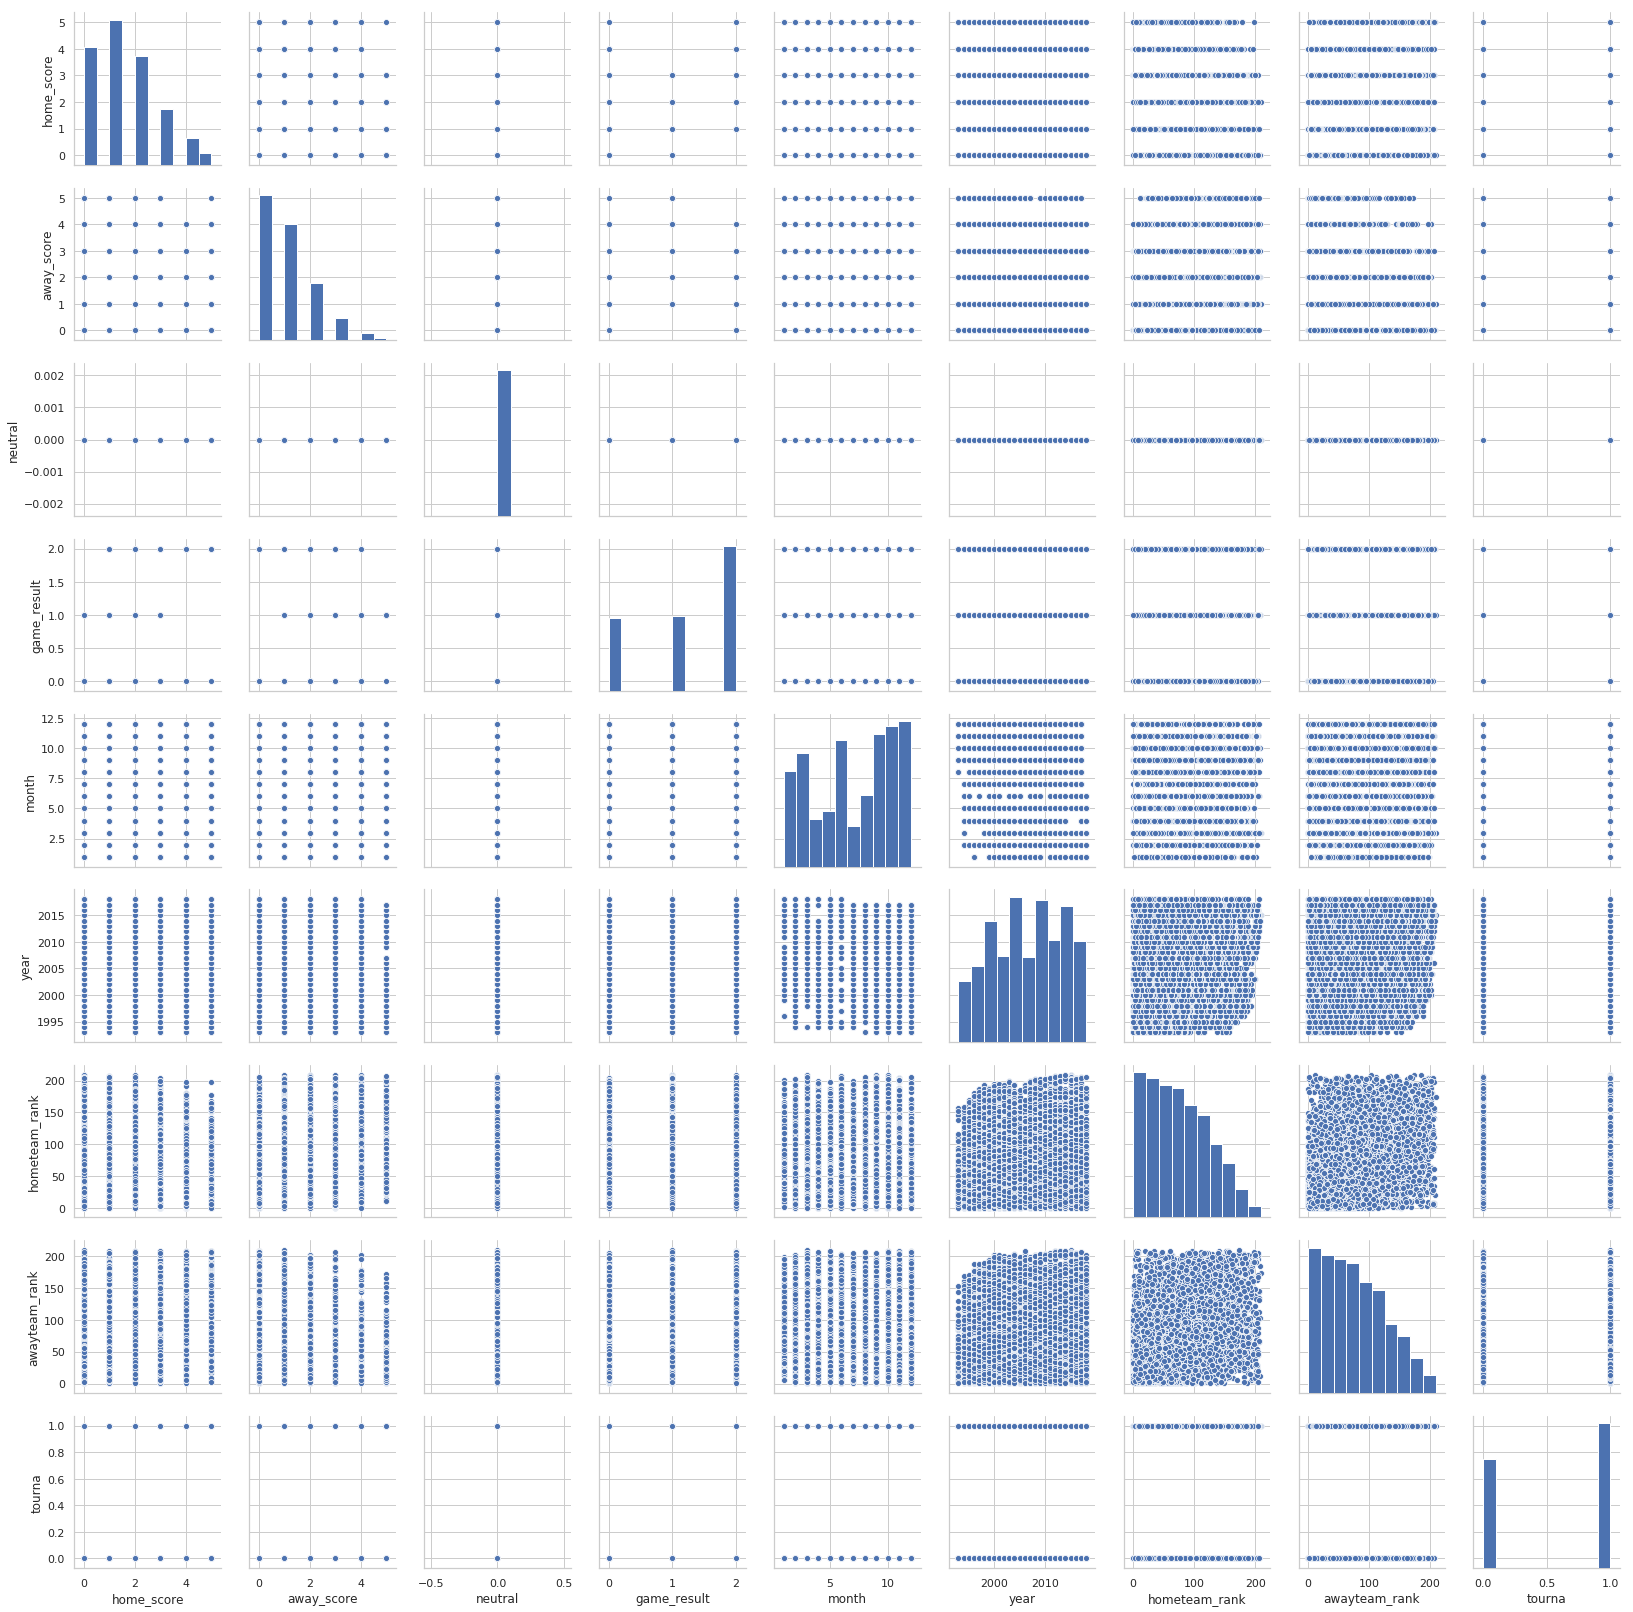

In [165]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set
sns.pairplot(df)

# Implementing the Solution
I shall use Ridge, Lasso and E|lastic Net regression models to predict the rank of the teams and compare the models. I shall use collinearity analysis to inform the features to use in the models.

Detecting Multicollinearity

In [209]:
# Let's display the correlations between the variables
colum = df.drop('neutral', axis = 1)
correlations = colum.corr()

correlations

,home_score,away_score,game_result,month,year,hometeam_rank,awayteam_rank,tourna
home_score,1.000000,-0.127005,0.570847,0.021311,-0.011306,-0.182733,0.276302,0.025026
away_score,-0.127005,1.000000,-0.255633,0.025170,-0.010355,0.176019,-0.222283,0.015371
game_result,0.570847,-0.255633,1.000000,0.008766,0.002373,-0.133207,0.208101,0.042596
month,0.021311,0.025170,0.008766,1.000000,0.035060,-0.019313,-0.013206,0.183973
year,-0.011306,-0.010355,0.002373,0.035060,1.000000,0.112683,0.122327,0.015711
hometeam_rank,-0.182733,0.176019,-0.133207,-0.019313,0.112683,1.000000,0.433032,0.042682
awayteam_rank,0.276302,-0.222283,0.208101,-0.013206,0.122327,0.433032,1.000000,0.027330
tourna,0.025026,0.015371,0.042596,0.183973,0.015711,0.042682,0.027330,1.000000


In [210]:
#computing VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

#from the table below the VIF scores are relatively low, so conclusion is there is no need of deleting any variable.

,home_score,away_score,game_result,month,year,hometeam_rank,awayteam_rank,tourna
home_score,1.689773,-0.201159,-0.841550,-0.022100,0.033951,0.462296,-0.540978,-0.004764
away_score,-0.201159,1.217049,0.280587,-0.028057,0.002390,-0.405656,0.443136,-0.015297
game_result,-0.841550,0.280587,1.565968,0.006794,-0.007810,0.025827,-0.039731,-0.051100
month,-0.022100,-0.028057,0.006794,1.038363,-0.038482,0.030509,0.008892,-0.191277
year,0.033951,0.002390,-0.007810,-0.038482,1.021999,-0.065918,-0.104100,-0.003873
hometeam_rank,0.462296,-0.405656,0.025827,0.030509,-0.065918,1.553256,-0.885970,-0.053094
awayteam_rank,-0.540978,0.443136,-0.039731,0.008892,-0.104100,-0.885970,1.652718,0.001066
tourna,-0.004764,-0.015297,-0.051100,-0.191277,-0.003873,-0.053094,0.001066,1.040019


## Ridge Regression

In [183]:
df.dtypes

home_team         object
away_team         object
home_score         int64
away_score         int64
city              object
country           object
neutral            int64
game_result        int64
month              int64
year               int64
game              object
hometeam_rank    float64
awayteam_rank    float64
tourna             int64
dtype: object

In [187]:
df.head(2)

,home_team,away_team,home_score,away_score,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank,tourna
0,Bolivia,Uruguay,3,1,La Paz,Bolivia,0,2,8,1993,Bolivia vs Uruguay,59.0,22.0,1
1,Brazil,Mexico,1,1,Maceió,Brazil,0,0,8,1993,Brazil vs Mexico,8.0,14.0,0


In [258]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'city', 'country',
       'neutral', 'game_result', 'month', 'year', 'game', 'hometeam_rank',
       'awayteam_rank', 'tourna'],
      dtype='object')

In [0]:
#creating the X and y datasets
#creating a model to predict the hometeam rank
X = df.drop(['hometeam_rank','awayteam_rank','game','city','country'], axis = 1)
y = df['hometeam_rank']

In [0]:
X = pd.get_dummies(X)

In [213]:
X.head()

,home_score,away_score,neutral,game_result,month,year,tourna,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,...,away_team_Serbia,away_team_Seychelles,away_team_Sierra Leone,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
0,3,1,0,2,8,1993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,8,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,2,8,1993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,2,8,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2,8,1993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#splitting the data set into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

## Ridge Regresson

In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [245]:
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

In [257]:
y.describe()

count    13110.000000
mean        76.092067
std         49.251667
min          1.000000
25%         35.000000
50%         71.000000
75%        111.000000
max        209.000000
Name: hometeam_rank, dtype: float64

In [255]:
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)

y_pred = ridge.predict(X_test)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
#calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(second_model)
print(rmse)

377.88332770437336
19.560104728285648


The RMSE score is 0

In [244]:
search.best_params_

{'alpha': 0.01}

## Lasso Regression